In [ ]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_hub as hub
from keras.applications import resnet_v2


In [ ]:
#setting target Directory

base_dir = '/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Data Set'
os.makedirs(base_dir, exist_ok=True)

# Download and extract the dataset
url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
get_data=tf.keras.utils.get_file('flower_photos',origin=url, cache_dir=base_dir, untar=True)

# Get the actual path to extracted dataset
data_dir = os.path.join(base_dir, 'datasets', 'flower_photos','flower_photos')
data_dir

'/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Data Set/datasets/flower_photos/flower_photos'

In [ ]:
data_dir= pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Data Set/datasets/flower_photos/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[0:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Data Set/datasets/flower_photos/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Data Set/datasets/flower_photos/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Data Set/datasets/flower_photos/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Data Set/datasets/flower_photos/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Transfer Learning/Data Set/datasets/flower_photos/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

In [ ]:
# Total Image
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
#Roses
Rose_count=len(list(data_dir.glob('roses/*')))
Rose_count

641

In [ ]:
flower_image_dict={
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [ ]:
flower_label_dict= {
    'roses' : 0,
    'daisy' : 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

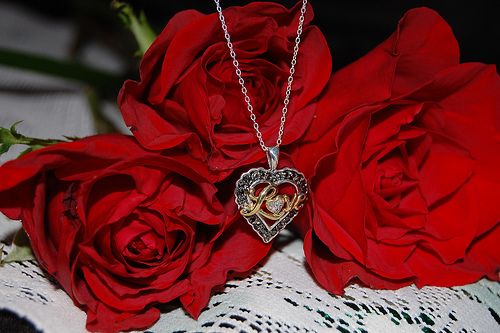

In [ ]:
import PIL.Image
Image.open(flower_image_dict['roses'][10])

In [ ]:
x= []
y= []

for label ,image in flower_image_dict.items():
  for image in image:
    img= cv2.imread(str(image))
    resized_image= cv2.resize(img,(128,128))
    image= resized_image /255
    x.append(image)
    y.append(flower_label_dict[label])



In [ ]:
x[0]

array([[[0.78039216, 0.8627451 , 0.94901961],
        [0.76470588, 0.87058824, 0.94117647],
        [0.78823529, 0.84705882, 0.91764706],
        ...,
        [0.82352941, 0.89019608, 0.96470588],
        [0.81568627, 0.88627451, 0.96078431],
        [0.80784314, 0.88627451, 0.96078431]],

       [[0.67058824, 0.78823529, 0.89803922],
        [0.65098039, 0.79607843, 0.90980392],
        [0.61568627, 0.74509804, 0.86666667],
        ...,
        [0.67058824, 0.81960784, 0.9254902 ],
        [0.67058824, 0.81568627, 0.9254902 ],
        [0.67843137, 0.81176471, 0.92941176]],

       [[0.64705882, 0.80784314, 0.90588235],
        [0.57254902, 0.69803922, 0.76470588],
        [0.58431373, 0.69411765, 0.70588235],
        ...,
        [0.69411765, 0.81568627, 0.94117647],
        [0.67843137, 0.81176471, 0.9372549 ],
        [0.66666667, 0.81176471, 0.9372549 ]],

       ...,

       [[0.70588235, 0.78823529, 0.85882353],
        [0.7254902 , 0.80784314, 0.87843137],
        [0.7372549 , 0

In [ ]:
x= np.array(x)
y= np.array(y)
x[0]

array([[[0.78039216, 0.8627451 , 0.94901961],
        [0.76470588, 0.87058824, 0.94117647],
        [0.78823529, 0.84705882, 0.91764706],
        ...,
        [0.82352941, 0.89019608, 0.96470588],
        [0.81568627, 0.88627451, 0.96078431],
        [0.80784314, 0.88627451, 0.96078431]],

       [[0.67058824, 0.78823529, 0.89803922],
        [0.65098039, 0.79607843, 0.90980392],
        [0.61568627, 0.74509804, 0.86666667],
        ...,
        [0.67058824, 0.81960784, 0.9254902 ],
        [0.67058824, 0.81568627, 0.9254902 ],
        [0.67843137, 0.81176471, 0.92941176]],

       [[0.64705882, 0.80784314, 0.90588235],
        [0.57254902, 0.69803922, 0.76470588],
        [0.58431373, 0.69411765, 0.70588235],
        ...,
        [0.69411765, 0.81568627, 0.94117647],
        [0.67843137, 0.81176471, 0.9372549 ],
        [0.66666667, 0.81176471, 0.9372549 ]],

       ...,

       [[0.70588235, 0.78823529, 0.85882353],
        [0.7254902 , 0.80784314, 0.87843137],
        [0.7372549 , 0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=1)

ResNetV2 Model

In [ ]:
base_model= resnet_v2.ResNet50V2(input_shape=(128,128,3), include_top=False, weights='imagenet')
base_model.trainabel= False

In [ ]:
# layers
model= keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 4, 4, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,090,629 (91.90 MB)

 Trainable params: 24,045,189 (91.73 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [ ]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
print("GPU Available:", tf.test.is_gpu_available())  # For TF <2.5
print("GPU Available:", tf.config.list_logical_devices('GPU'))  # For TF >=2.5


GPU Available: True
GPU Available: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [ ]:
with tf.device('/GPU:0'):
    model.fit(x_train, y_train, epochs=10, batch_size=4)


Epoch 1/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.5358 - loss: 1.1558
Epoch 2/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7403 - loss: 0.6691
Epoch 3/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8146 - loss: 0.5042
Epoch 4/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8581 - loss: 0.3938
Epoch 5/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8956 - loss: 0.2952
Epoch 6/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9220 - loss: 0.2293
Epoch 7/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9378 - loss: 0.1790
Epoch 8/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9586 - loss: 0.1409
Epoch 9/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9628 - loss: 0.1088
Epoch 10/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9637 - loss: 0.1055


In [ ]:
model.evaluate(x_train, y_train)

86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9984 - loss: 0.0065


[0.005932879168540239, 0.9985465407371521]

In [ ]:
model.evaluate(x_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.8655 - loss: 0.5366


[0.6184863448143005, 0.8485838770866394]

In [ ]:
y_pred= model.predict(x_test)
y_pred[0:5]

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


array([[5.8237393e-04, 3.7784519e-04, 5.7394602e-03, 4.6124851e-04,
        9.9283916e-01],
       [9.9258398e-07, 9.9998379e-01, 7.2918760e-06, 4.4401336e-06,
        3.6014537e-06],
       [3.0556350e-04, 1.9416038e-04, 2.3751792e-05, 1.5331114e-03,
        9.9794346e-01],
       [1.5777904e-04, 9.7620016e-04, 5.5583466e-02, 9.4283026e-01,
        4.5222411e-04],
       [2.1718398e-07, 9.9988425e-01, 1.5380124e-06, 1.1243157e-04,
        1.5648286e-06]], dtype=float32)

In [ ]:
y_pred_label= []
for i in y_pred:
  y_pred_label.append(int(np.argmax(i)))
y_pred_label[0:5]

[4, 1, 4, 3, 1]

In [ ]:
y_test[0:5]

array([2, 1, 4, 3, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy Score: ",accuracy_score(y_test, y_pred_label))

In [ ]:
print(confusion_matrix(y_test, y_pred_label))

[[124   6   6   2  29]
 [  6 151   6   0   6]
 [  4  10 192  10   9]
 [  2   4   6 134   5]
 [ 16   6   5   1 178]]


In [ ]:
print(classification_report(y_test, y_pred_label, target_names={'roses','daisy','dandelion','sunflowers','tulips'}))

              precision    recall  f1-score   support

       daisy       0.82      0.74      0.78       167
   dandelion       0.85      0.89      0.87       169
  sunflowers       0.89      0.85      0.87       225
      tulips       0.91      0.89      0.90       151
       roses       0.78      0.86      0.82       206

    accuracy                           0.85       918
   macro avg       0.85      0.85      0.85       918
weighted avg       0.85      0.85      0.85       918

